In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [27]:
X_train = np.loadtxt("H:\Image Classification CNN Keras Dataset-20240926T180815Z-001\Image Classification CNN Keras Dataset\input.csv", delimiter = ',')
Y_train = np.loadtxt("H:\Image Classification CNN Keras Dataset-20240926T180815Z-001\Image Classification CNN Keras Dataset\labels.csv", delimiter = ',')

X_test = np.loadtxt("H:\Image Classification CNN Keras Dataset-20240926T180815Z-001\Image Classification CNN Keras Dataset\input_test.csv", delimiter = ',')
Y_test = np.loadtxt("H:\Image Classification CNN Keras Dataset-20240926T180815Z-001\Image Classification CNN Keras Dataset\labels_test.csv", delimiter = ',')

In [28]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [29]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


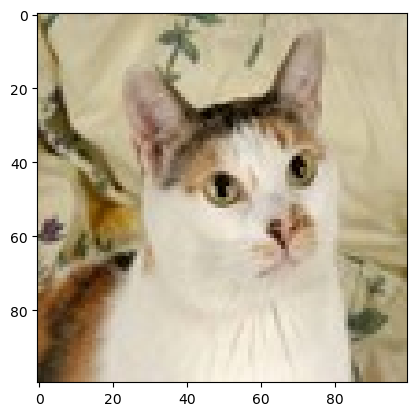

In [30]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :] )
plt.show()

In [36]:
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape= (100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

        

In [37]:
model.compile( loss = 'binary_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [38]:
model.fit(X_test,Y_test,batch_size =64 , epochs= 20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.4713 - loss: 0.7305
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.5430 - loss: 0.6910
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.6051 - loss: 0.6822
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step - accuracy: 0.5581 - loss: 0.6845
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.6663 - loss: 0.6538
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.6883 - loss: 0.6228
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.7437 - loss: 0.5694
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.7150 - loss: 0.5395
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.7009 - loss: 0.5696
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.7377 - loss: 0.4933
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 392ms/step - accuracy: 0.8081 - loss: 0.4682
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.8033 - lo

In [39]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9877 - loss: 0.0487


[0.07124067097902298, 0.9850000143051147]

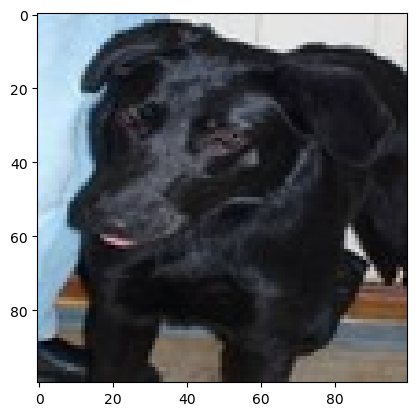

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Our model says it is a : dog


In [40]:
idx2= random.randint(0,len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred= model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred>0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)